In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [27]:
os.environ["KERAS_BACKEND"] = "tensorflow"

# To make sure that we can reproduce the experiment and get the same results
np.random.seed(10)

# The dimension of our random noise vector.
random_dim = 100

In [28]:
def load_minst_data():
    # load the data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # normalize our inputs to be in the range[-1, 1]
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    # convert x_train with a shape of (60000, 28, 28) to (60000, 784) so we have
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

In [29]:
def get_optimizer():
    return Adam(lr=0.0002,beta_1=0.5)

In [35]:
def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256,input_dim=random_dim,
                       kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(784,activation='tanh'))
    generator.compile(loss='binary_crossentropy',optimizer=optimizer)
    
    return generator
    

In [31]:
def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024,input_dim=784,kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(1,activation='sigmoid'))
    discriminator.compile(loss="binary_crossentropy",optimizer=optimizer)
    
    return discriminator    
    

In [32]:
def get_gan_network(discriminator,random_dim,generator,optimizer):
    discriminator.trainable = False
    gan_input = Input(shape=(random_dim,))
    x= generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(input=gan_input,outputs=gan_output)
    gan.compile(loss='binary_crossentropy',optimizer=optimizer)
    return gan

In [33]:
def plot_generated_images(epoch,generator,examples=100,dim=(10,10),figsize=(10,10)):
    noise = np.random.normal(0,1,size=[examples,random_dim])
    generated_images=generator.predict(noise)
    generated_images = generated_images.reshape(examples,28,28)
    
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0],dim[1],i+1)
        plt.imshow(generated_images[i],interpolation='nearest',cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png'%epoch)

/Users/shravan/Desktop/seniorResearch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("se..., inputs=Tensor("in...)`
  
  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 2 ---------------


  0%|          | 1/468 [00:00<01:31,  5.12it/s]

--------------- Epoch 3 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 4 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 5 ---------------


  0%|          | 1/468 [00:00<01:31,  5.10it/s]

--------------- Epoch 6 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 7 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 8 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 9 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 10 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 11 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 12 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 13 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 14 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 15 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 16 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 17 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 18 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 19 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 20 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 21 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 22 ---------------


  0%|          | 1/468 [00:00<01:31,  5.09it/s]

--------------- Epoch 23 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 24 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 25 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 26 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 27 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 28 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 29 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 30 ---------------


  0%|          | 1/468 [00:00<01:14,  6.29it/s]

--------------- Epoch 31 ---------------


  0%|          | 1/468 [00:00<01:11,  6.53it/s]

--------------- Epoch 32 ---------------


  0%|          | 1/468 [00:00<01:13,  6.37it/s]

--------------- Epoch 33 ---------------


 46%|████▌     | 216/468 [00:35<00:43,  5.81it/s]

KeyboardInterrupt: 

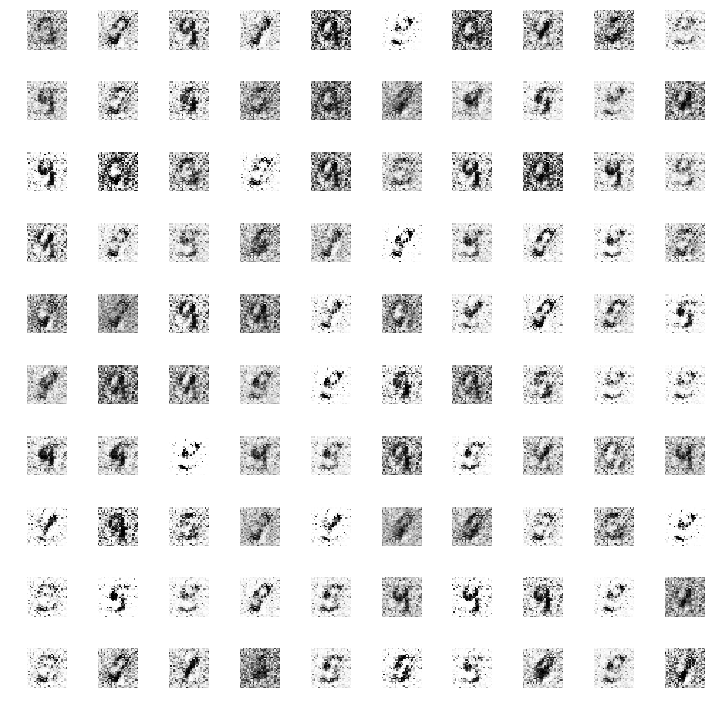

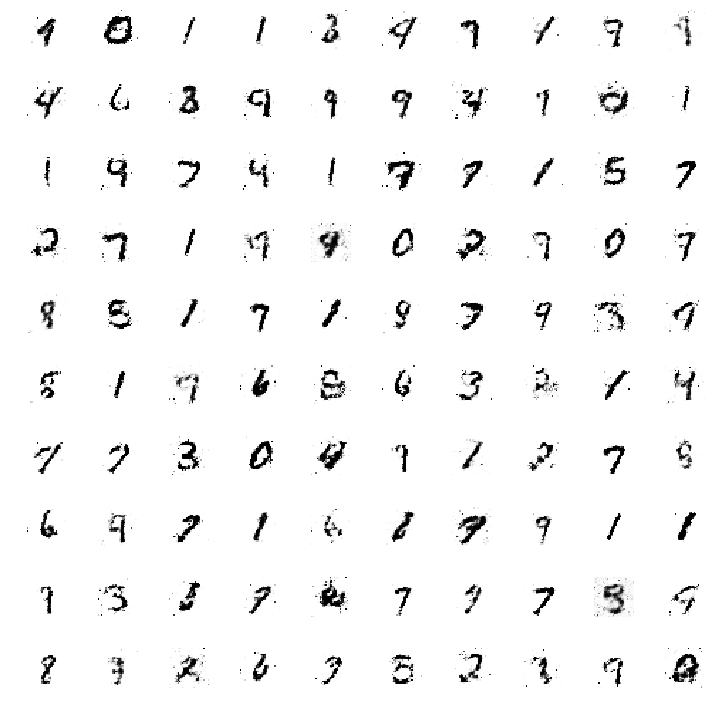

In [39]:
def train(epochs=1, batch_size=128):
    # Get the training and testing data
    x_train, y_train, x_test, y_test = load_minst_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] / batch_size

    # Build our GAN netowrk
    adam = get_optimizer()
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(int(batch_count))):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9

            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)

if __name__ == '__main__':
    train(400,128)